In [21]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
sys.path.insert(0, '../modules/')
import cleaning as cln

## 1. Initial Data Preparation and Understanding

In [23]:
#Read the full data from 'train' and 'store' files:

full_df_train = pd.read_csv("../data/train.csv")
full_df_store = pd.read_csv("../data/store.csv")

In [24]:
#Merge the train and store data frames:

full_df = cln.merge(full_df_train, full_df_store)

In [25]:
print("Total number of rows in full data set: ", full_df.shape[0])

Total number of rows in full data set:  637774


In [26]:
full_df.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [27]:
#Check if there are nulls in full data

full_df.isnull().any().any()

True

In [28]:
#Check which columns of full data have null values

full_df.isnull().any()

Date                         False
Store                         True
DayOfWeek                     True
Sales                         True
Customers                     True
Open                          True
Promo                         True
StateHoliday                  True
SchoolHoliday                 True
StoreType                     True
Assortment                    True
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                        True
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

Column Date has  0% null values.
Column Store has  3% null values.
Column DayOfWeek has  3% null values.
Column Sales has  3% null values.
Column Customers has  3% null values.
Column Open has  3% null values.
Column Promo has  3% null values.
Column StateHoliday has  3% null values.
Column SchoolHoliday has  3% null values.
Column StoreType has  3% null values.
Column Assortment has  3% null values.
Column CompetitionDistance has  3% null values.
Column CompetitionOpenSinceMonth has  34% null values.
Column CompetitionOpenSinceYear has  34% null values.
Column Promo2 has  3% null values.
Column Promo2SinceWeek has  51% null values.
Column Promo2SinceYear has  51% null values.
Column PromoInterval has  51% null values.


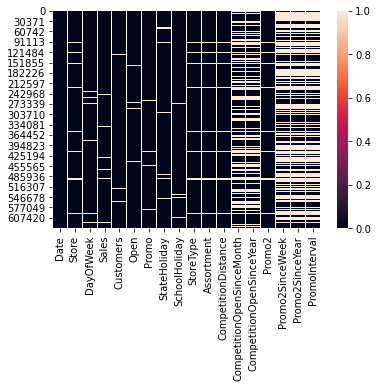

In [29]:
#Check the null values:

nulls = full_df.isnull()
sns.heatmap(nulls)

cln.count_null_features(full_df)

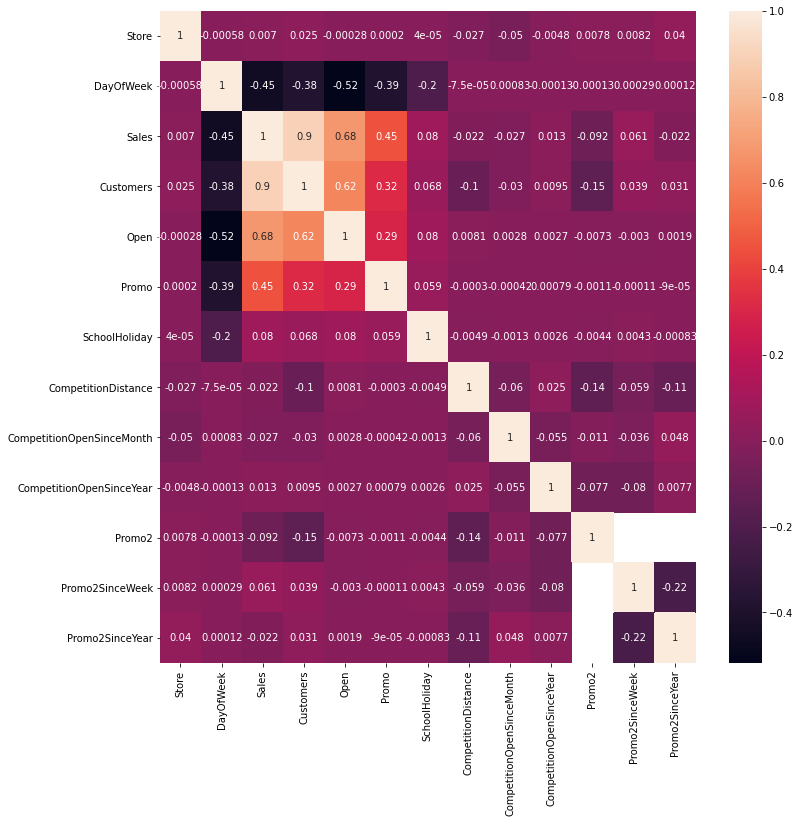

In [30]:
#Check the correlations

corrMatrix = full_df.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

## 2. Data Cleaning

In [31]:
#Remove the Cusomers column, as was instructed to us

full_df = cln.drop_column(full_df, column='Customers')

In [32]:
full_df.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [13]:
#Remove the rows with null target values

clean_target_df = cln.drop_null_targets(full_df, target='Sales')

In [33]:
print("Total number of rows after removing null targets: ", clean_target_df.shape[0])

Total number of rows after removing null targets:  618747


In [34]:
# For columns with only a small amoung of null values, we simply drop the nulls that are there.
# The threshold is if the rows with null values are less than 3% of the total data set.

# We have to come back to this because low statistics is not a good justification for droping rows.

clean_df = cln.drop_null_features(clean_target_df, threshold=0.03, verbose=True)

Total number of rows in full data set:  618747
Column Date has  0% null values.
Column Store has  3% null values.
Column DayOfWeek has  3% null values.
Removed rows with null value from DayOfWeek.
Column Sales has  0% null values.
Column Open has  3% null values.
Removed rows with null value from Open.
Column Promo has  3% null values.
Removed rows with null value from Promo.
Column StateHoliday has  3% null values.
Removed rows with null value from StateHoliday.
Column SchoolHoliday has  3% null values.
Removed rows with null value from SchoolHoliday.
Column StoreType has  3% null values.
Removed rows with null value from StoreType.
Column Assortment has  0% null values.
Column CompetitionDistance has  0% null values.
Removed rows with null value from CompetitionDistance.
Column CompetitionOpenSinceMonth has  26% null values.
Column CompetitionOpenSinceYear has  26% null values.
Column Promo2 has  0% null values.
Column Promo2SinceWeek has  41% null values.
Column Promo2SinceYear has 

Column Date has  0% null values.
Column Store has  0% null values.
Column DayOfWeek has  0% null values.
Column Sales has  0% null values.
Column Open has  0% null values.
Column Promo has  0% null values.
Column StateHoliday has  0% null values.
Column SchoolHoliday has  0% null values.
Column StoreType has  0% null values.
Column Assortment has  0% null values.
Column CompetitionDistance has  0% null values.
Column CompetitionOpenSinceMonth has  32% null values.
Column CompetitionOpenSinceYear has  32% null values.
Column Promo2 has  0% null values.
Column Promo2SinceWeek has  49% null values.
Column Promo2SinceYear has  49% null values.
Column PromoInterval has  49% null values.


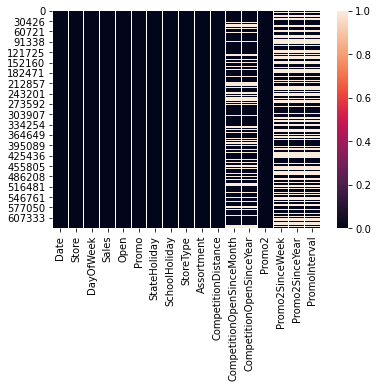

In [35]:
#Check the null values after the rough using a heatmap

nulls = clean_df.isnull()
sns.heatmap(nulls)

cln.count_null_features(clean_df)

In [36]:
#Split the data into training and cross validation samples
#The last 3 months go to the validation sample

#split_date = '2014-05-01'

#df_train = rosman_df_new.loc[rosman_df_new.loc[:, 'Date'] < split_date, :]
#df_cv = rosman_df_new.loc[rosman_df_new.loc[:, 'Date'] >= split_date, :]